# Juneau Tide Guage Analysis

NOAA Tides and Currents provides tide gauge data for stations across the United States.

Go to: https://tidesandcurrents.noaa.gov

Click on Alaska, then search “Juneau” to find the tide gauge in Juneau, AK (station ID: 9452210).  Click on “Station Home”  then  use the “Tides/Water Levels” drop down to select  “Water Levels”. Change  the date range so that it starts in 1945, change units to “metric”, select interval “month” and then update “data only”, then update “plot”.

Click “Export to CSV” to save the data in a CSV file. You will need to have the CSV file saved in the same folder on your computer as the jupyter notebook you use for plotting. 

This jupyter notebook will walk you through how to import, clean, organize, and plot data in Part 1. Then, in Part 2 we will calculate the rate of sea level rise based on the raw data. The goal of this is to be able to replicate this activity with data from another tide gague to compare regional rates of sea level rise. 

## Part 1: Import and clean data to plot a time series

In [21]:
#import necesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import scipy.signal
import seaborn as sns
from scipy import stats

In [22]:
#import csv file
#I renamed the downloaded csv file as "Juneau_metric" before uploading it here.
df = pd.read_csv('Juneau_metric.csv')

In [23]:
#check it out
print(df)

           Date Time (GMT)  Highest  MHHW (m)  MHW (m)  MSL (m)  MTL (m)  \
0    1936/06/01      00:00    6.813     6.085    5.710    3.677    3.659   
1    1936/07/01      00:00    6.691     6.097    5.741    3.689    3.677   
2    1936/08/01      00:00    6.691     6.042    5.747    3.616    3.592   
3    1936/09/01      00:00    7.088     6.012    5.792    3.619    3.592   
4    1936/10/01      00:00    7.271     6.152    5.920    3.704    3.689   
..          ...        ...      ...       ...      ...      ...      ...   
961  2021/11/01      00:00    6.290     5.028    4.732    2.677    2.646   
962  2021/12/01      00:00    5.937     4.968    4.558    2.532    2.505   
963  2022/01/01      00:00    6.065     4.961    4.568    2.539    2.510   
964  2022/02/01      00:00    5.601     4.743    4.419    2.417    2.384   
965  2022/03/01      00:00    5.589     4.783    4.548    2.461    2.426   

     MLW (m)  MLLW (m)  Lowest (m)  Inf  
0      1.604     1.053      -0.014    0  
1  

In [24]:
# interpolate to fill in missing values. default = linear interpolation of every column in the data
df = df.interpolate()

In [25]:
#drop null values (NaN), if any gaps in data exist
df.dropna(how='any', inplace=True)

In [26]:
#convert date column to datetime
df['Date']=pd.to_datetime(df['Date'])

In [27]:
#copy dates column to iterate over later:
df['date'] = df['Date']

In [28]:
#set Date as index
df= df.set_index('Date')

In [29]:
#check it out again
print(df)

           Time (GMT)  Highest  MHHW (m)  MHW (m)  MSL (m)  MTL (m)  MLW (m)  \
Date                                                                           
1936-06-01      00:00    6.813     6.085    5.710    3.677    3.659    1.604   
1936-07-01      00:00    6.691     6.097    5.741    3.689    3.677    1.610   
1936-08-01      00:00    6.691     6.042    5.747    3.616    3.592    1.434   
1936-09-01      00:00    7.088     6.012    5.792    3.619    3.592    1.388   
1936-10-01      00:00    7.271     6.152    5.920    3.704    3.689    1.455   
...               ...      ...       ...      ...      ...      ...      ...   
2021-11-01      00:00    6.290     5.028    4.732    2.677    2.646    0.559   
2021-12-01      00:00    5.937     4.968    4.558    2.532    2.505    0.453   
2022-01-01      00:00    6.065     4.961    4.568    2.539    2.510    0.452   
2022-02-01      00:00    5.601     4.743    4.419    2.417    2.384    0.349   
2022-03-01      00:00    5.589     4.783

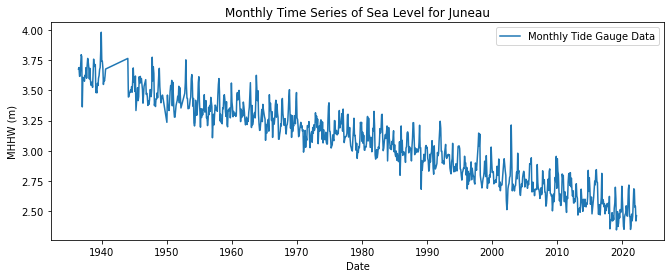

In [31]:
#Plot monthly time series
fig, ax = plt.subplots(figsize=(11,4))
ax.plot(df['MSL (m)'], label ='Monthly Tide Gauge Data')
ax.set_title('Monthly Time Series of Sea Level for Juneau');
ax.set_ylabel('MHHW (m)');
ax.set_xlabel('Date');
ax.legend();

## Part 2: Calculate rate of sea level rise using linear regression

In [33]:
#make a list of all of the dates to create an array (list) of values along the x-axis
x=np.arange(df['date'].size)
#the y falues are the mean high high water data here
y = df['MHHW (m)']
#this finds the linear regression of the x and y variables (a linear fit of the data)
res = stats.linregress(x,y)

In [ ]:
#see what this looks like
print(x)

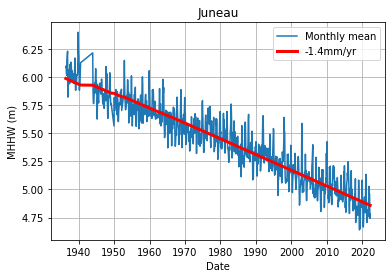

In [39]:
#Plot the raw data
plt.plot(df.index,y, label = 'Monthly mean')
#Plot the linear fit
plt.plot(df.index, res.intercept+res.slope*x, 'r', linewidth = 3, 
         #to make the slope of the line meaningful, we have to multiply it by 12
         #becuase we are using monthly data and we want this represented in mm/yr
         #multiply by 100 to change from m to mm
         #round by 3 place values
             label = str(round(res.slope*12*100,3))+'mm/yr')
#this adds a data to the graph
plt.legend()
#adds y-axis label
plt.ylabel('MHHW (m)')
#adds x-axis label
plt.xlabel('Date')
#adds title
plt.title('Juneau');

#this adds a grid on the plot
plt.grid()

#save the figure using this code, change 'fig_name' to save as a different name
plt.savefig('fig_name')

### Reflection Questions

1. Using the calculated rate of sea level change, how would you project sea level change  in Juneau over the next 100 years? 

2. Does this projection align or differ from NASA's Sea Level Projection Tool? https://sealevel.nasa.gov/ipcc-ar6-sea-level-projection-tool

3. Why does your projection differ from NASA's?

## Part 3: Repeat parts 1 and part 2 with another tide gague in a location of your choice to compare rates of relative sea level rise. 

In [ ]:
#import csv file


In [ ]:
# interpolate to fill in missing values. 


In [ ]:
#drop NaN values, if any gaps in data exist


In [ ]:
#convert date column to datetime


In [ ]:
#copy dates column to iterate over later:


In [ ]:
#set Date as index


In [ ]:
#Plot monthly time series
